/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)



🔹 Training LSTM Model...
Epoch 1/7
1331/1331 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 102.8581
Epoch 2/7
1331/1331 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 31.5246
Epoch 3/7
1331/1331 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 15.9500
Epoch 4/7
1331/1331 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 7.9936
Epoch 5/7
1331/1331 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - loss: 8.0973
Epoch 6/7
1331/1331 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 6.0158
Epoch 7/7
1331/1331 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 4.6279
666/666 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

🔹 Training CNN Model...
Epoch 1/7


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1331/1331 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 151.8462
Epoch 2/7
1331/1331 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 8.7659
Epoch 3/7
1331/1331 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 1.1990
Epoch 4/7
1331/1331 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 1.1176
Epoch 5/7
1331/1331 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 1.3514
Epoch 6/7
1331/1331 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 1.2578
Epoch 7/7
1331/1331 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.9377
666/666 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step

🔹 Training CatBoost Model...
Learning rate set to 0.082628
0:	learn: 12.3053785	total: 63.3ms	remaining: 1m 3s
100:	learn: 0.4619316	total: 1.29s	remaining: 11.5s
200:	learn: 0.1812908	total: 2.58s	remaining: 10.2s
300:	learn: 0.1042551	total: 3.92s	remaining: 9.1s
400:	learn: 0.0710445	total: 5.32s	remaining: 7.94s
500:	learn: 0.0528934	total: 6.63s	remaining: 6.61s
600:	learn: 0.0431225	total: 7.96s	remaining: 5.28s
700:	learn: 0.0358221	total: 10.8s	remaining: 4.63s
800:	learn: 0.03

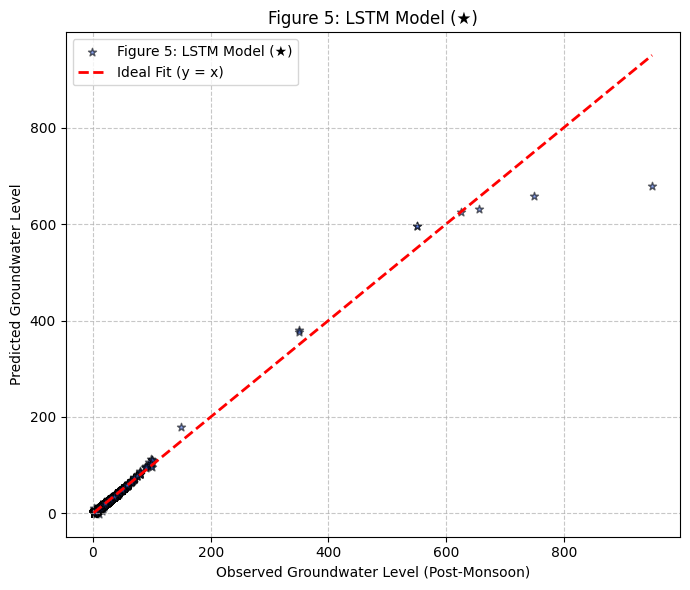

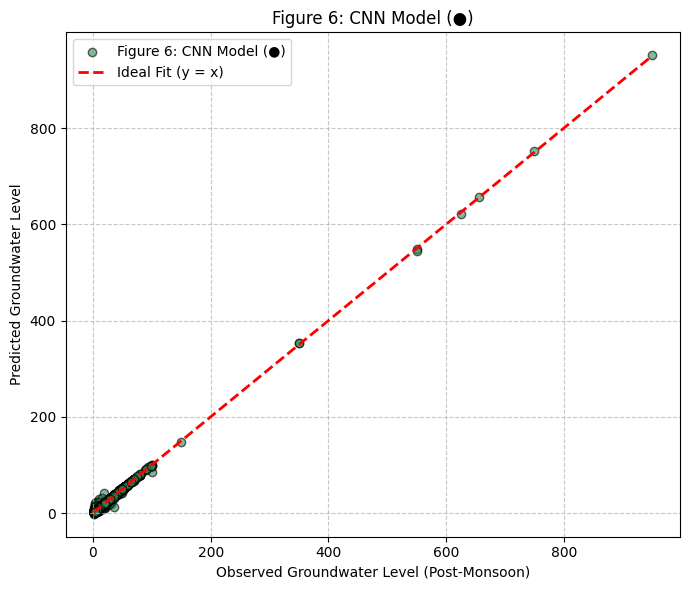

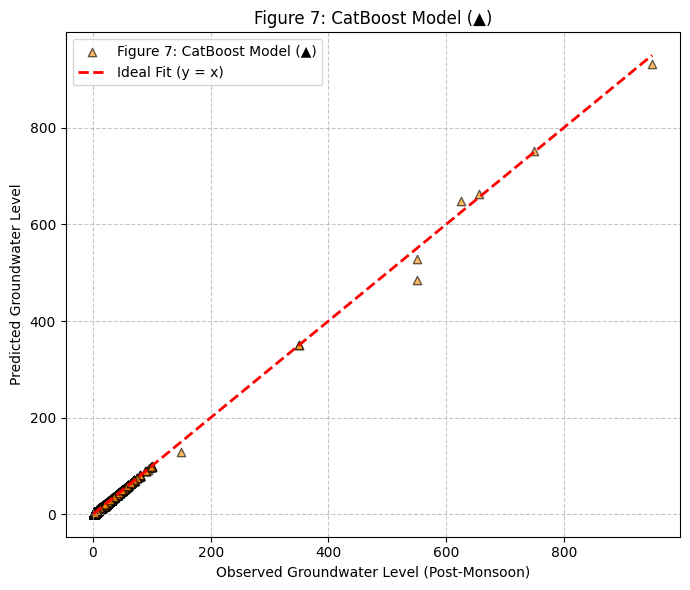

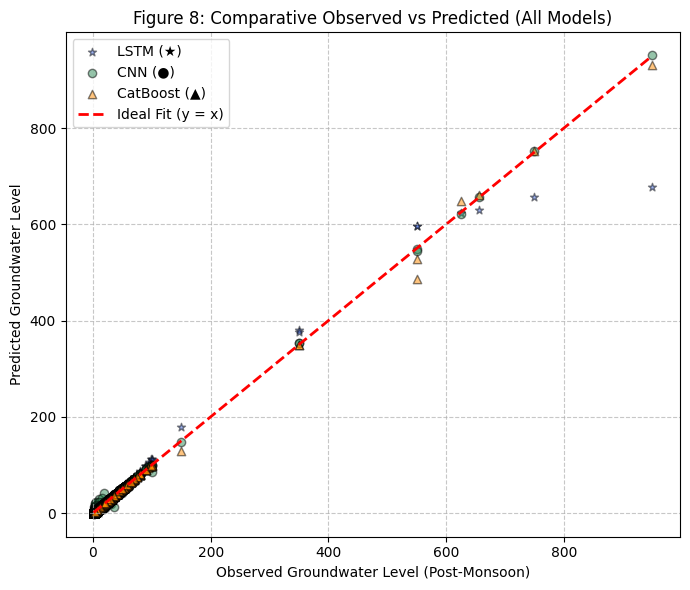

In [ ]:

# AI-based Groundwater Prediction: LSTM vs CNN vs CatBoost
# Author: K Praveen Kumar



# 1. Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from catboost import CatBoostRegressor
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Conv1D, MaxPooling1D, Flatten


# 2. Load and Preprocess Dataset

df = pd.read_csv("UPVillageSchedule.csv")

# Fill missing values and encode categorical columns
df["village_name"] = df["village_name"].fillna("Unknown")
label_cols = [
    "state_name", "district_name", "block_tehsil_name", "village_name",
    "ref_village_type_name", "major_medium_scheme", "ref_selection_wua_exists_name"
]
for col in label_cols:
    df[col] = LabelEncoder().fit_transform(df[col])

# Select features and target
features = [
    "state_name", "district_name", "block_tehsil_name",
    "geographical_area", "cultivable_area", "net_sown_area",
    "gross_irrigated_area_kharif_season", "gross_irrigated_area_rabi_season",
    "gross_irrigated_area_total", "net_irrigated_area",
    "avg_ground_water_level_pre_monsoon", "avg_ground_water_level_post_monsoon"
]
target = "avg_ground_water_level_post_monsoon"

X = df[features]
y = df[target]

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


# 3. Define Evaluation Metrics

def nse(y_true, y_pred):
    """Nash–Sutcliffe Efficiency"""
    return 1 - np.sum((y_true - y_pred)**2) / np.sum((y_true - np.mean(y_true))**2)

def cc(y_true, y_pred):
    """Pearson Correlation Coefficient"""
    return np.corrcoef(y_true, y_pred)[0, 1]

def evaluate_model(y_true, y_pred):
    """Return all metrics for given predictions"""
    return {
        "RMSE": np.sqrt(mean_squared_error(y_true, y_pred)),
        "MAE": mean_absolute_error(y_true, y_pred),
        "R2": r2_score(y_true, y_pred),
        "CC": cc(y_true, y_pred),
        "NSE": nse(y_true, y_pred)
    }


# 4. LSTM Model (7 epochs)

X_train_LSTM = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test_LSTM = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

lstm = Sequential([
    LSTM(64, input_shape=(1, X_train.shape[1])),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1)
])
lstm.compile(optimizer='adam', loss='mse')
print("\n🔹 Training LSTM Model...")
lstm.fit(X_train_LSTM, y_train, epochs=7, batch_size=64, verbose=1)
y_pred_lstm = lstm.predict(X_test_LSTM).ravel()


# 5. CNN Model (7 epochs)

X_train_CNN = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_CNN = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

cnn = Sequential([
    Conv1D(64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)),
    MaxPooling1D(2),
    Flatten(),
    Dense(32  , activation='relu'),
    Dense(1)
])
cnn.compile(optimizer='adam', loss='mse')
print("\n🔹 Training CNN Model...")
cnn.fit(X_train_CNN, y_train, epochs=7, batch_size=64, verbose=1)
y_pred_cnn = cnn.predict(X_test_CNN).ravel()


# 6. CatBoost Regressor

print("\n🔹 Training CatBoost Model...")
cb = CatBoostRegressor(verbose=100, random_seed=42)
cb.fit(X_train, y_train)
y_pred_cb = cb.predict(X_test)


# 7. Evaluate and Compare All Models

metrics = {
    "LSTM (7 epochs)": evaluate_model(y_test, y_pred_lstm),
    "CNN (7 epochs)": evaluate_model(y_test, y_pred_cnn),
    "CatBoost": evaluate_model(y_test, y_pred_cb)
}

results_df = pd.DataFrame(metrics).T.round(3)
print("\n=== Model Performance Comparison ===\n")
print(results_df)


# 8. Plotting (Distinct Markers for Each Model)

def plot_results(y_true, y_pred, title, filename, marker, color):
    """Scatter plot with custom markers"""
    plt.figure(figsize=(7,6))
    plt.scatter(y_true, y_pred, alpha=0.6, edgecolor='k', marker=marker,
                color=color, label=title)
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()],
             'r--', lw=2, label="Ideal Fit (y = x)")
    plt.xlabel("Observed Groundwater Level (Post-Monsoon)")
    plt.ylabel("Predicted Groundwater Level")
    plt.title(title)
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.savefig(filename, dpi=300)
    plt.show()

# Individual model plots
plot_results(y_test, y_pred_lstm, "Figure 5: LSTM Model (★)", "lstm_results.png", marker='*', color='royalblue')
plot_results(y_test, y_pred_cnn,  "Figure 6: CNN Model (●)", "cnn_results.png", marker='o', color='seagreen')
plot_results(y_test, y_pred_cb,   "Figure 7: CatBoost Model (▲)", "catboost_results.png", marker='^', color='darkorange')


# 9. Combined Comparison Plot (Figure 8)

plt.figure(figsize=(7,6))
plt.scatter(y_test, y_pred_lstm, alpha=0.5, marker='*', color='royalblue', edgecolor='k', label='LSTM (★)')
plt.scatter(y_test, y_pred_cnn, alpha=0.5, marker='o', color='seagreen', edgecolor='k', label='CNN (●)')
plt.scatter(y_test, y_pred_cb, alpha=0.5, marker='^', color='darkorange', edgecolor='k', label='CatBoost (▲)')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Ideal Fit (y = x)')
plt.xlabel("Observed Groundwater Level (Post-Monsoon)")
plt.ylabel("Predicted Groundwater Level")
plt.title("Figure 8: Comparative Observed vs Predicted (All Models)")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig("comparison_all_models.png", dpi=300)
plt.show()



